In [1]:
# Part 1 - Building the CNN

# Importing the Keras libraries and packages
import sys, os
#from keras.models import Sequential
#from keras.layers import Convolution2D
#from keras.layers import MaxPooling2D
#from keras.layers import Flatten
#from keras.layers import Dense


from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Activation
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Dropout
#from keras.la
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras import backend as K


Using TensorFlow backend.


# Data Exploration with Pandas

Shift + tab # show the documantation

In [2]:
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra

# env(mini) installationg commands
# pip install numpy scipy
# pip install numpy pandas
# pip install numpy matplotlib

In [3]:
# Classes: graduation, picnic and metting (csv)

Reading csv file (Tabular Data)

In [4]:
df = pd.read_csv('dataset_images_minitest.csv')
df.head() #Show 5 first lines

,Filename,Category
0,1007270_99118848fd.jpg,graduation
1,1007274_075d925378.jpg,graduation
2,1009219698_b40b9e6d87.jpg,graduation
3,10100422_0feca68bfb.jpg,graduation
4,10100587_48faabb61a.jpg,graduation


In [5]:
type(df) #pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

In [6]:
# inspect it using the .info() and .head() command
#summary of some features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20987 entries, 0 to 20986
Data columns (total 2 columns):
Filename    20987 non-null object
Category    20987 non-null object
dtypes: object(2)
memory usage: 328.0+ KB


In [7]:
df.describe()

,Filename,Category
count,20987,20987
unique,20987,3
top,18497022955_a6c2b49456.jpg,meeting
freq,1,7000


# Indexing

In [8]:
df.iloc[20986] # Check Data info

Filename    9985209285_b57e578e41.jpg
Category                      meeting
Name: 20986, dtype: object

### Intervalo das classes:

Graduation [0 - 6991] = 6992 imagens

Picnic [6992 - 13986] = 6994 imagens

Meeting [13986 - 20986] = 7000 imagens

### Train - dataset_images_minitest (train).csv

Graduation [4894]

Picnic [4896]

Meeting [4900]

### Test - dataset_images_minitest (test).csv

Graduation [2098]

Picnic [2098]

Meeting [2100]

In [9]:
df.loc[0:4,'Category'] # show the 4 first itens on "Category" column

0    graduation
1    graduation
2    graduation
3    graduation
4    graduation
Name: Category, dtype: object

In [10]:
df['Filename'].head() # show the 4 first itens on "Filename" column

0       1007270_99118848fd.jpg
1       1007274_075d925378.jpg
2    1009219698_b40b9e6d87.jpg
3      10100422_0feca68bfb.jpg
4      10100587_48faabb61a.jpg
Name: Filename, dtype: object

In [11]:
df[['Filename','Category']].head()

,Filename,Category
0,1007270_99118848fd.jpg,graduation
1,1007274_075d925378.jpg,graduation
2,1009219698_b40b9e6d87.jpg,graduation
3,10100422_0feca68bfb.jpg,graduation
4,10100587_48faabb61a.jpg,graduation


# Unique Values

In [12]:
df['Category'].unique() 

array(['graduation', 'picnic', 'meeting'], dtype=object)

# Unstructured data

# Images

In [13]:
from PIL import Image

# pip install pillow

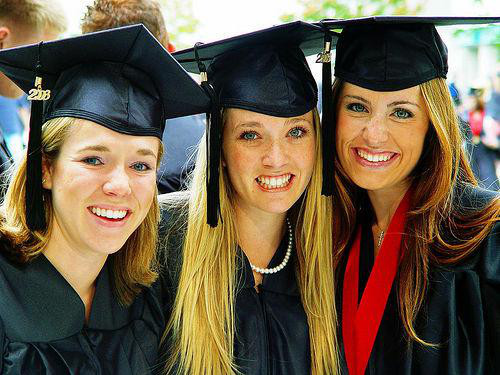

In [14]:
#img = Image.open('data_folder/p010_0031.jpg')
img = Image.open('foto.jpg')
img

In [15]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [16]:
#imgarray = np.asarray(img)

In [17]:
#imgarray.shape

In [18]:
#imgarray.shape().shape

In [3]:
from subprocess import check_output
print(check_output(["ls", "input/"]).decode("utf8"))

dataset_images_minitest (test).csv
dataset_images_minitest (train).csv



In [7]:
# Read training and test data files
train = pd.read_csv("input/dataset_images_minitest (train).csv").values
test  = pd.read_csv("input/dataset_images_minitest (test).csv").values

print(train)

[['1007270_99118848fd.jpg' 'graduation']
 ['1007274_075d925378.jpg' 'graduation']
 ['1009219698_b40b9e6d87.jpg' 'graduation']
 ...
 ['6190908621_2c4fd12c67.jpg' 'meeting']
 ['6190929589_4b238c5eee.jpg' 'meeting']
 ['6190948937_446362057f.jpg' 'meeting']]


In [6]:
# Reshape and normalize training data
trainX = train[:, 1:].reshape(train.shape[0],1,28, 28).astype( 'float32' )
X_train = trainX / 255.0

y_train = train[:,0]


# Reshape and normalize test data
testX = test[:,1:].reshape(test.shape[0],1, 28, 28).astype( 'float32' )
X_test = testX / 255.0

y_test = test[:,0]

ValueError: cannot reshape array of size 14690 into shape (14690,1,28,28)

In [47]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

NameError: name 'y_train' is not defined

In [13]:
model = Sequential()
K.set_image_dim_ordering('th')
model.add(Convolution2D(30, 5, 5, border_mode= 'valid' , input_shape=(1, 28, 28),activation= 'relu' ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(15, 3, 3, activation= 'relu' ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation= 'relu' ))
model.add(Dense(50, activation= 'relu' ))
model.add(Dense(10, activation= 'softmax' ))
  # Compile model
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

/home/medeirosph/.conda/envs/mini/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, (5, 5), input_shape=(1, 28, 28..., activation="relu", padding="valid")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/medeirosph/.conda/envs/mini/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`
  """


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
